<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 3*

# 📝 Assignment



## 1. 주어진 matrix에 대해서, numpy를 사용하여, `eigenvalue`와 `eigenvector`를 구하고, 각각 `value`, `vector`에 저장하세요.

\begin{bmatrix} 4 & 2 \\ 2 & 4 \end{bmatrix}

In [20]:
# eigenvalue, eigenvector 구하기.
import numpy as np

mat = np.array([[4,2], 
                [2,4]])

value = np.linalg.eig(mat)[0]   # eigenvalue
vector = np.linalg.eig(mat)[1]  # eigenvector

print('eigenvalue = {}, \neigenvector = \n{}'.format(np.linalg.eig(mat)[0], np.linalg.eig(mat)[1]))

eigenvalue = [6. 2.], 
eigenvector = 
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


## 2. Penguins dataset을 사용하여 numerical feature 4개에 대해서 2차원으로 PCA를 시행 후 PC1 & PC2를 사용하여 scatter plot을 그리세요.

- 데이터셋 사용을 위해, 다음 링크를 참조하세요.

<http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset>

- 4개의 feature는 `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g` 입니다.

- 이후 2개의 PC를 이용하여 설명되는 variance의 ratio를 `ratio`에 저장하세요.

- 다음과 같은 결과가 나와야 합니다.

<img src='https://i.imgur.com/5BCEHeL.png'>

In [102]:
# seaborn 에서 penguins 데이터 불러오기 culmen = 부리 = bill
import seaborn

# 데이터 결측값 drop
df = seaborn.load_dataset('penguins').dropna()
# 데이터 추출, 리셋 인덱스
df = df[['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].reset_index()
feature = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
# 데이터의 feature 표준화
scaler = StandardScaler()
df[feature] = scaler.fit_transform(df[feature])  # df[feature]에 표준화한 데이터를 저장
df[feature]

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
3,-1.335566,1.085877,-0.569284,-0.941606
4,-0.859415,1.747026,-0.783651,-0.692852
...,...,...,...,...
328,0.587352,-1.762145,0.931283,0.892957
329,0.514098,-1.457000,1.002739,0.799674
330,1.173384,-0.744994,1.502928,1.919069
331,0.221082,-1.202712,0.788372,1.234995


In [154]:
# PCA 실행
import pandas as pd

pca2 = PCA(n_components = 2) # 주성분 2개로 결정
PC2 = pca2.fit_transform(df[feature]) # principalComponents = pca2.fit(px)
print("Eigenvectors: \n{}\n\nEigenvalues: {}\n".format(pca2.components_, pca2.explained_variance_))
print("2개의 주성분이 전체 분산의 %.3f을 설명\n" %sum(pca2.explained_variance_ratio_))
print('PC1은 전체 분산의 %.3f을 설명\n'%pca2.explained_variance_ratio_[0])
print('PC2은 전체 분산의 %.3f을 설명\n'%pca2.explained_variance_ratio_[1])

# 주성분으로 이루어진 데이터프레임 구성
print('\n Principal Dataframe:\n')
PrincipalComponents = pd.DataFrame(data = PC2, columns = ['PC1', 'PC2'])
pd.concat([PrincipalComponents, df['species']], axis = 1)

Eigenvectors: 
[[ 0.45375317 -0.39904723  0.576825    0.54967471]
 [ 0.6001949   0.79616951  0.00578817  0.07646366]]

Eigenvalues: [2.75362487 0.7804609 ]

2개의 주성분이 전체 분산의 0.881을 설명

PC1은 전체 분산의 0.686을 설명

PC2은 전체 분산의 0.195을 설명


 Principal Dataframe:



,PC1,PC2,species
0,-1.853593,0.032069,Adelie
1,-1.316254,-0.443527,Adelie
2,-1.376605,-0.161230,Adelie
3,-1.885288,-0.012351,Adelie
4,-1.919981,0.817598,Adelie
...,...,...,...
328,1.997716,-0.976771,Gentoo
329,1.832651,-0.784510,Gentoo
330,2.751505,0.266556,Gentoo
331,1.713854,-0.725875,Gentoo


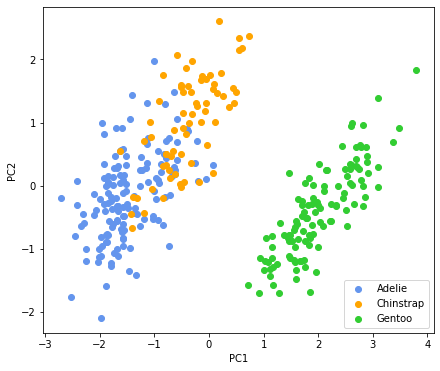

In [142]:
# 그래프로 시각화
color = ['cornflowerblue', 'orange', 'limegreen']
species = list(set(df['species'].tolist()))
plt.figure(figsize = (7,6))
for i, j in zip (color, species):
  plt.scatter(PrincipalComponents[df['species'] == j]['PC1'], PrincipalComponents[df['species'] == j]['PC2'], c = i, marker = 'o', label = j)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'lower right')

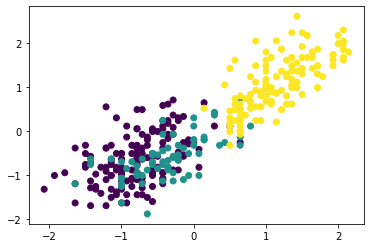

In [144]:
# 시각화 연습
import matplotlib.pyplot as plt

plt.scatter(df['flipper_length_mm'], df['body_mass_g'], c = df['species'].replace({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}), marker = 'o')

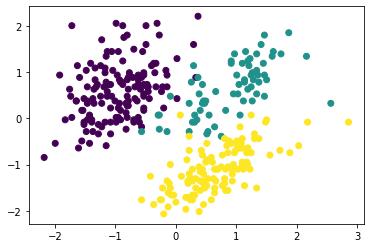

In [145]:
plt.scatter(df['bill_length_mm'], df['bill_depth_mm'], c = df['species'].replace({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}), marker = 'o')

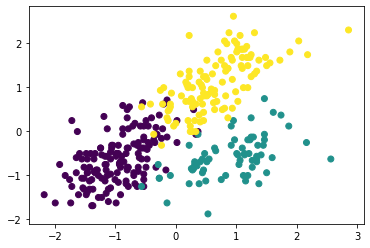

In [146]:
plt.scatter(df['bill_length_mm'], df['body_mass_g'], c = df['species'].replace({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}), marker = 'o')

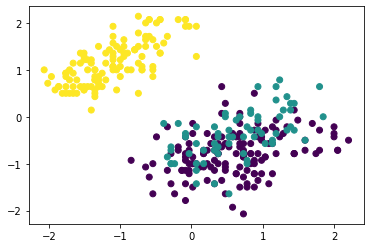

In [147]:
plt.scatter(df['bill_depth_mm'], df['flipper_length_mm'], c = df['species'].replace({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}), marker = 'o')

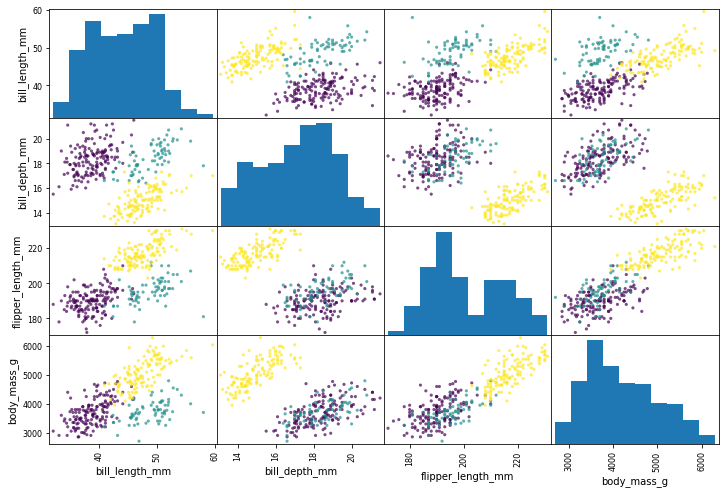

In [54]:
# 고차원 데이터 분석을 위한 plot -> scatter_matrix(frame, s = 15, alpha = 0.5, figsize = None, ax = None, gride = False, diagonal = 'hist', marker = '.')
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix(df, c = df.dropna()['species'].replace({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}), marker='o', s=10, alpha=.7, figsize=(12,8))
plt.show()

## 🔥 도전 과제

### "Scree Plot" 에 대해서 알아보고, 위에서 PCA로 만든 데이터셋을 사용하여 만들어보세요. 90%의 내용을 설명하기 위해서, 몇개의 PC를 사용해야 하나요?


PC 3개 사용 하면 됩니다 !
3개의 성분이 전체 데이터 분산의 97.3%를 설명 할수 있다.
PC1로 전체 분산의 68.6%를 설명 할수 있다.
PC2로 전체 분산의 19.5%를 설명 할수 있다.
PC3로 전체 분산의 9.2%를 설명 할수 있다.


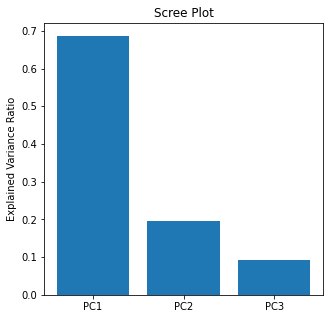

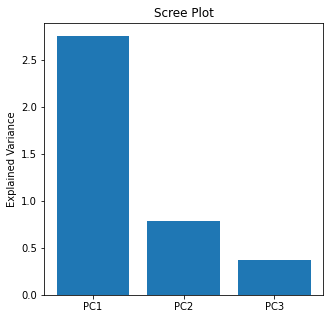

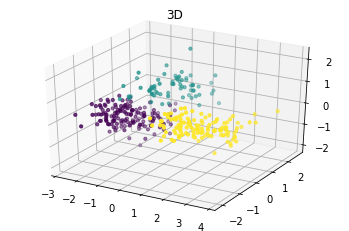

In [243]:
# 이곳에 답안을 작성하시기 바랍니다
print('PC 3개 사용 하면 됩니다 !')
myPCA(3)

In [238]:
def myPCA(n = 2):
  import seaborn as sea
  df = sea.load_dataset('penguins').dropna()[['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].reset_index()  # 데이터셋 불러오고, 결측값 제거 하고, 데이터 추출 후 리셋
  feature = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
  df[feature] = StandardScaler().fit_transform(df[feature])   # 데이터 feature 들의 표준화.

  import pandas as pd
  pca = PCA(n_components = n) # 주성분을 입력받은 n개로 설정
  pc = pca.fit_transform(df[feature]) # pca 결과로 데이터 feature로 pc 값들 구함.
  
  # PCA 결과 printing 과정.
  pclist = []
  for i in range(n):
    pclist += ['PC{}'.format(i+1)]
  print('{}개의 성분이 전체 데이터 분산의 {}%를 설명 할수 있다.'.format(n, round(sum(pca.explained_variance_ratio_)*100, 1)))
  for i, j in zip(pclist, range(n)):
    print(i+'로 전체 분산의 {}%를 설명 할수 있다.'.format(round(pca.explained_variance_ratio_[j]*100, 1)))

  # 구한 데이터로 "Scree Plot" 그리기.
  import matplotlib.pyplot as plt
  PC_figure = pd.DataFrame(data = pc, columns = pclist)  # PC 리스트 dataframe에 입력
  
  plt.figure(figsize = (5, 5))
  plt.title('Scree Plot')
  plt.ylabel('Explained Variance Ratio')
  plt.bar(x = pclist, height= pca.explained_variance_ratio_)
  plt.figure(figsize = (5, 5))
  plt.title('Scree Plot')
  plt.ylabel('Explained Variance')
  plt.bar(x = pclist, height= pca.explained_variance_)
  # 3D 시각화
  if n == 2:
    pd.concat([PC_figure, df['species']], axis = 1)
    fig = plt.figure()
    ax = fig.gca(projection = '3d')
    plt.title('3D')
    ax.scatter(PC_figure['PC1'],PC_figure['PC2'], s = 10, c = df['species'].replace({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}))
  elif n == 3:
    pd.concat([PC_figure, df['species']], axis = 1)
    fig = plt.figure()
    ax = fig.gca(projection = '3d')
    plt.title('3D')
    ax.scatter(PC_figure['PC1'],PC_figure['PC2'],PC_figure['PC3'], s = 10, c = df['species'].replace({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}))
  plt.show()

2개의 성분이 전체 데이터 분산의 88.1%를 설명 할수 있다.
PC1로 전체 분산의 68.6%를 설명 할수 있다.
PC2로 전체 분산의 19.5%를 설명 할수 있다.


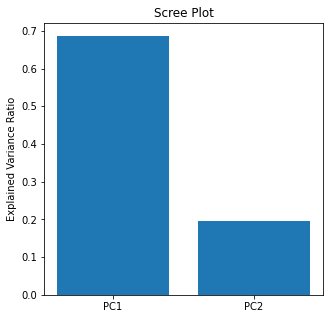

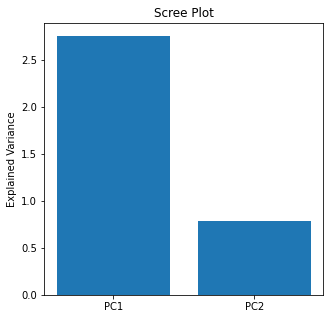

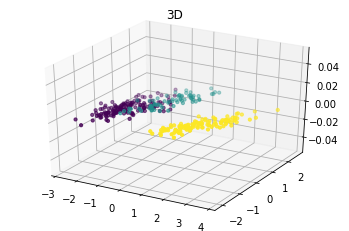

In [239]:
myPCA(2)

3개의 성분이 전체 데이터 분산의 97.3%를 설명 할수 있다.
PC1로 전체 분산의 68.6%를 설명 할수 있다.
PC2로 전체 분산의 19.5%를 설명 할수 있다.
PC3로 전체 분산의 9.2%를 설명 할수 있다.


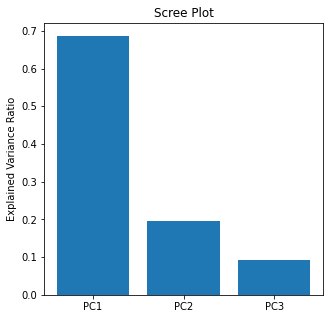

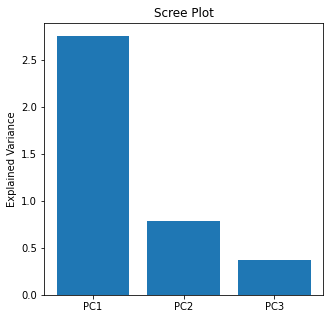

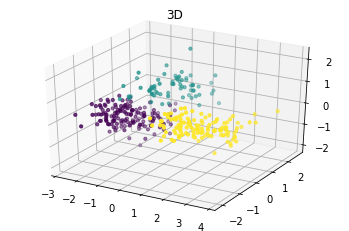

In [240]:
myPCA(3)

4개의 성분이 전체 데이터 분산의 100.0%를 설명 할수 있다.
PC1로 전체 분산의 68.6%를 설명 할수 있다.
PC2로 전체 분산의 19.5%를 설명 할수 있다.
PC3로 전체 분산의 9.2%를 설명 할수 있다.
PC4로 전체 분산의 2.7%를 설명 할수 있다.


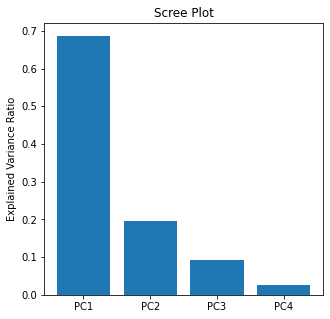

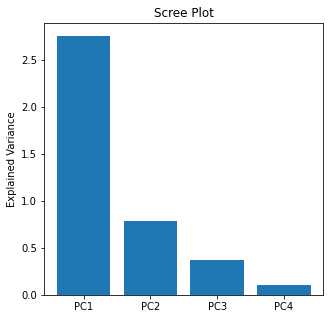

In [241]:
myPCA(4)